In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def generate_fake_data():
    

    t_data = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
    V_data = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000] 

    return t_data,V_data

In [28]:
def gompertz_growth(t, V, c, V_max):
    return c * V * np.log(V_max / V)

In [29]:
def logistic_growth(t, V, c, V_max):
    return c * V * (1 - V / V_max)


In [30]:
def euler_solver(model, t, V0, params, dt=0.1):
    V = [V0]  
    for i in range(1, len(t)):
        V_new = V[-1] + dt * model(t[i], V[-1], **params)  
        V.append(V_new)
    return V


In [34]:
def Hean_method(model_growth, t, V0, c, V_max, dt=0.1):
    V = [V0]
    for i in range(1, len(t)):
        t_current = t[i-1]
        V_current = V[-1]
        

        y1 = model_growth(t_current, V_current, c, V_max)
        V_euler = V_current + dt * y1
        

        y2 = model_growth(t_current + dt, V_euler, c, V_max)
        V_new = V_current + dt * 0.5 * (y1 + y2)
        V.append(V_new)
    
    return np.array(V)

In [36]:
import numpy as np

def runga_method(model_growth, t, V0, c, V_max, dt):

    V = [V0]  
    for i in range(1, len(t)):
        t_current = t[i - 1]
        V_current = V[-1]

        
        y1 = dt * model_growth(t_current, V_current, c, V_max)
        y2 = dt * model_growth(t_current + dt / 2, V_current + y1 / 2, c, V_max)
        y3 = dt * model_growth(t_current + dt / 2, V_current + y2 / 2, c, V_max)
        y4 = dt * model_growth(t_current + dt, V_current + y3, c, V_max)

       
        V_new = V_current + (y1 + 2 * y2 + 2 * y3 + y4) / 6
        V.append(V_new)
    
    return np.array(V)


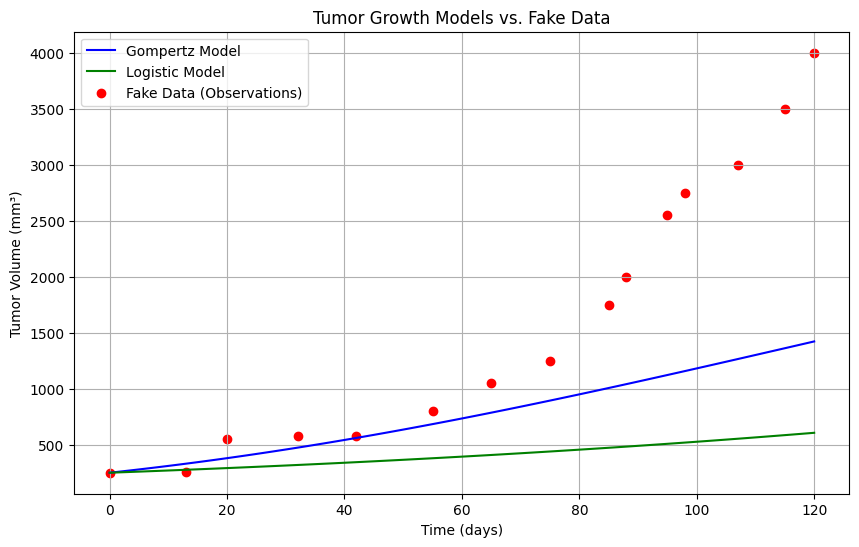

In [35]:
if __name__ == "__main__":
    t_data, V_data = generate_fake_data()

    V0 = 250
    params = {"c": 0.1, "V_max": 4000}

    tijd = np.linspace(0, 120, 100)

    V_sim_gompertz = euler_solver(gompertz_growth, tijd, V0, params)
    V_sim_logistic = euler_solver(logistic_growth, tijd, V0, params)


    plt.figure(figsize=(10, 6))

    plt.plot(tijd, V_sim_gompertz, label="Gompertz Model", color="blue")
    plt.plot(tijd, V_sim_logistic, label="Logistic Model", color="green")

    plt.scatter(t_data, V_data, color="red", label="Fake Data (Observations)")

    plt.title("Tumor Growth Models vs. Fake Data")
    plt.xlabel("Time (days)")
    plt.ylabel("Tumor Volume (mm³)")
    plt.legend()
    plt.grid(True)
    plt.show()

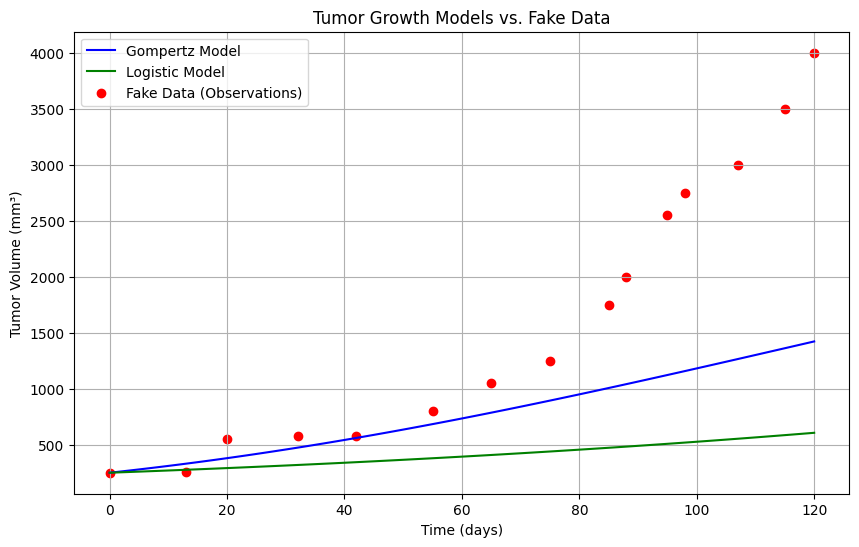

In [33]:
if __name__ == "__main__":
    t_data, V_data = generate_fake_data()

    V0 = 250
    c = 0.1
    V_max = 4000
    dt = 0.1
    tijd = np.linspace(0, 120, 100)

    V_sim_gompertz_heun = Hean_method(gompertz_growth, tijd, V0, c, V_max, dt)
    V_sim_logistic_heun = Hean_method(logistic_growth, tijd, V0, c, V_max, dt)
    


    plt.figure(figsize=(10, 6))

    plt.plot(tijd, V_sim_gompertz, label="Gompertz Model", color="blue")
    plt.plot(tijd, V_sim_logistic, label="Logistic Model", color="green")
    

    plt.scatter(t_data, V_data, color="red", label="Fake Data (Observations)")

    plt.title("Tumor Growth Models vs. Fake Data")
    plt.xlabel("Time (days)")
    plt.ylabel("Tumor Volume (mm³)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
if __name__ == "__main__":
    t_data, V_data = generate_fake_data()

    V0 = 250
    c = 0.1
    V_max = 4000
    dt = 0.1
    tijd = np.linspace(0, 120, 100)

    V_sim_gompertz_heun = runga_method(gompertz_growth, tijd, V0, c, V_max, dt)
    V_sim_logistic_heun = runga_method(logistic_growth, tijd, V0, c, V_max, dt)
    


    plt.figure(figsize=(10, 6))

    plt.plot(tijd, V_sim_gompertz, label="Gompertz Model", color="blue")
    plt.plot(tijd, V_sim_logistic, label="Logistic Model", color="green")
    

    plt.scatter(t_data, V_data, color="red", label="Fake Data (Observations)")

    plt.title("Tumor Growth Models vs. Fake Data")
    plt.xlabel("Time (days)")
    plt.ylabel("Tumor Volume (mm³)")
    plt.legend()
    plt.grid(True)
    plt.show()